In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from datetime import date, timedelta

import mechafil.data as mecha_data
import mechafil.data_spacescope as data_spacescope
from mechafil.data import get_historical_network_stats, get_sector_expiration_stats, setup_spacescope

import mechafil.power as np_power
import mechafil_jax.power as jax_power

import matplotlib.pyplot as plt

In [3]:
setup_spacescope('/Users/kiran/code/filecoin-mecha-twin/kiran_spacescope_auth.json')

In [4]:
forecast_length = 360*2
start_date = date(2021, 3, 16)
current_date = date.today() - timedelta(days=2)
end_date = current_date + timedelta(days=forecast_length)

In [5]:
# Get sector scheduled expirations
res = get_sector_expiration_stats(start_date, current_date, end_date)
rb_known_scheduled_expire_vec = res[0]
qa_known_scheduled_expire_vec = res[1]
known_scheduled_pledge_release_full_vec = res[2]
# Get daily stats
fil_stats_df = get_historical_network_stats(start_date, current_date, end_date)
current_day_stats = fil_stats_df[fil_stats_df["date"] >= current_date].iloc[0]
# Forecast power stats
rb_power_zero = current_day_stats["total_raw_power_eib"] * 1024.0
qa_power_zero = current_day_stats["total_qa_power_eib"] * 1024.0

In [13]:
rbp = 3
rr = 0.3
fpr = 0.3
duration = 360

In [14]:
mechafil_rb_df, mechafil_qa_df = np_power.forecast_power_stats(
    rb_power_zero,
    qa_power_zero,
    rbp,
    rb_known_scheduled_expire_vec,
    qa_known_scheduled_expire_vec,
    rr,
    fpr,
    duration,
    forecast_length,
    qap_method='basic'
)

In [17]:
jax_rb_dict, jax_qa_dict = jax_power.forecast_power_stats(
    rb_power_zero,
    qa_power_zero,
    rbp,
    rb_known_scheduled_expire_vec,
    qa_known_scheduled_expire_vec,
    rr,
    fpr,
    duration,
    forecast_length,
)

<IPython.core.display.Javascript object>


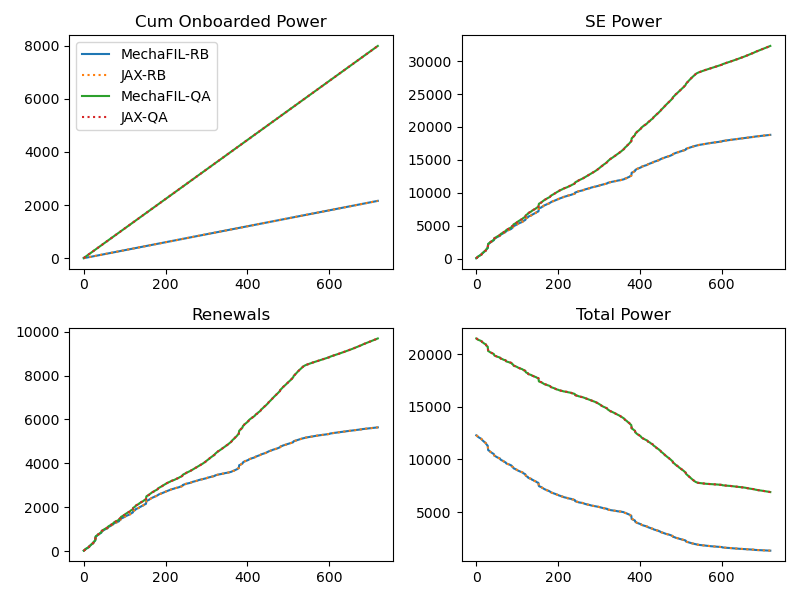

In [18]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.plot(mechafil_rb_df['cum_onboarded_power'], label='MechaFIL-RB')
plt.plot(jax_rb_dict['cum_onboarded_power'], label='JAX-RB', linestyle=':')
plt.plot(mechafil_qa_df['cum_onboarded_power'], label='MechaFIL-QA')
plt.plot(jax_qa_dict['cum_onboarded_power'], label='JAX-QA', linestyle=':')
plt.title('Cum Onboarded Power')
plt.legend()

plt.subplot(2,2,2)
plt.plot(mechafil_rb_df['cum_expire_scheduled_power'], label='MechaFIL-RB')
plt.plot(jax_rb_dict['cum_expire_scheduled_power'], label='JAX-RB', linestyle=':')
plt.plot(mechafil_qa_df['cum_expire_scheduled_power'], label='MechaFIL-QA')
plt.plot(jax_qa_dict['cum_expire_scheduled_power'], label='JAX-QA', linestyle=':')
plt.title('SE Power')

plt.subplot(2,2,3)
plt.plot(mechafil_rb_df['cum_renewed_power'], label='MechaFIL-RB')
plt.plot(jax_rb_dict['cum_renewed_power'], label='JAX-RB', linestyle=':')
plt.plot(mechafil_qa_df['cum_renewed_power'], label='MechaFIL-QA')
plt.plot(jax_qa_dict['cum_renewed_power'], label='JAX-QA', linestyle=':')
plt.title('Renewals')

plt.subplot(2,2,4)
plt.plot(mechafil_rb_df['total_power'], label='MechaFIL-RB')
plt.plot(jax_rb_dict['total_power'], label='JAX-RB', linestyle=':')
plt.plot(mechafil_qa_df['total_power'], label='MechaFIL-QA')
plt.plot(jax_qa_dict['total_power'], label='JAX-QA', linestyle=':')
plt.title('Total Power')

plt.tight_layout()